Modelling process of Prius

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, interp2d
import math
import scipy.io as scio
from IPython.display import Image

state input (SOC-state of charge)

In [2]:
car_spd = 15
car_a = 1
Eng_pwr_opt = 40000 
SOC = 0.55 

Vehicle parameters

In [3]:
Wheel_R = 0.287
mass = 1449
C_roll  = 0.013
density_air = 1.2
area_frontal = 2.23
G = 9.81
C_d = 0.26

# the factor of F_roll
T_factor = 1
       
# paramsmeters of transmission system
Pgs_R = 78
Pgs_S = 30

# speed ratio from ring gear to wheel
Pgs_K = 3.93  

Engine parameters

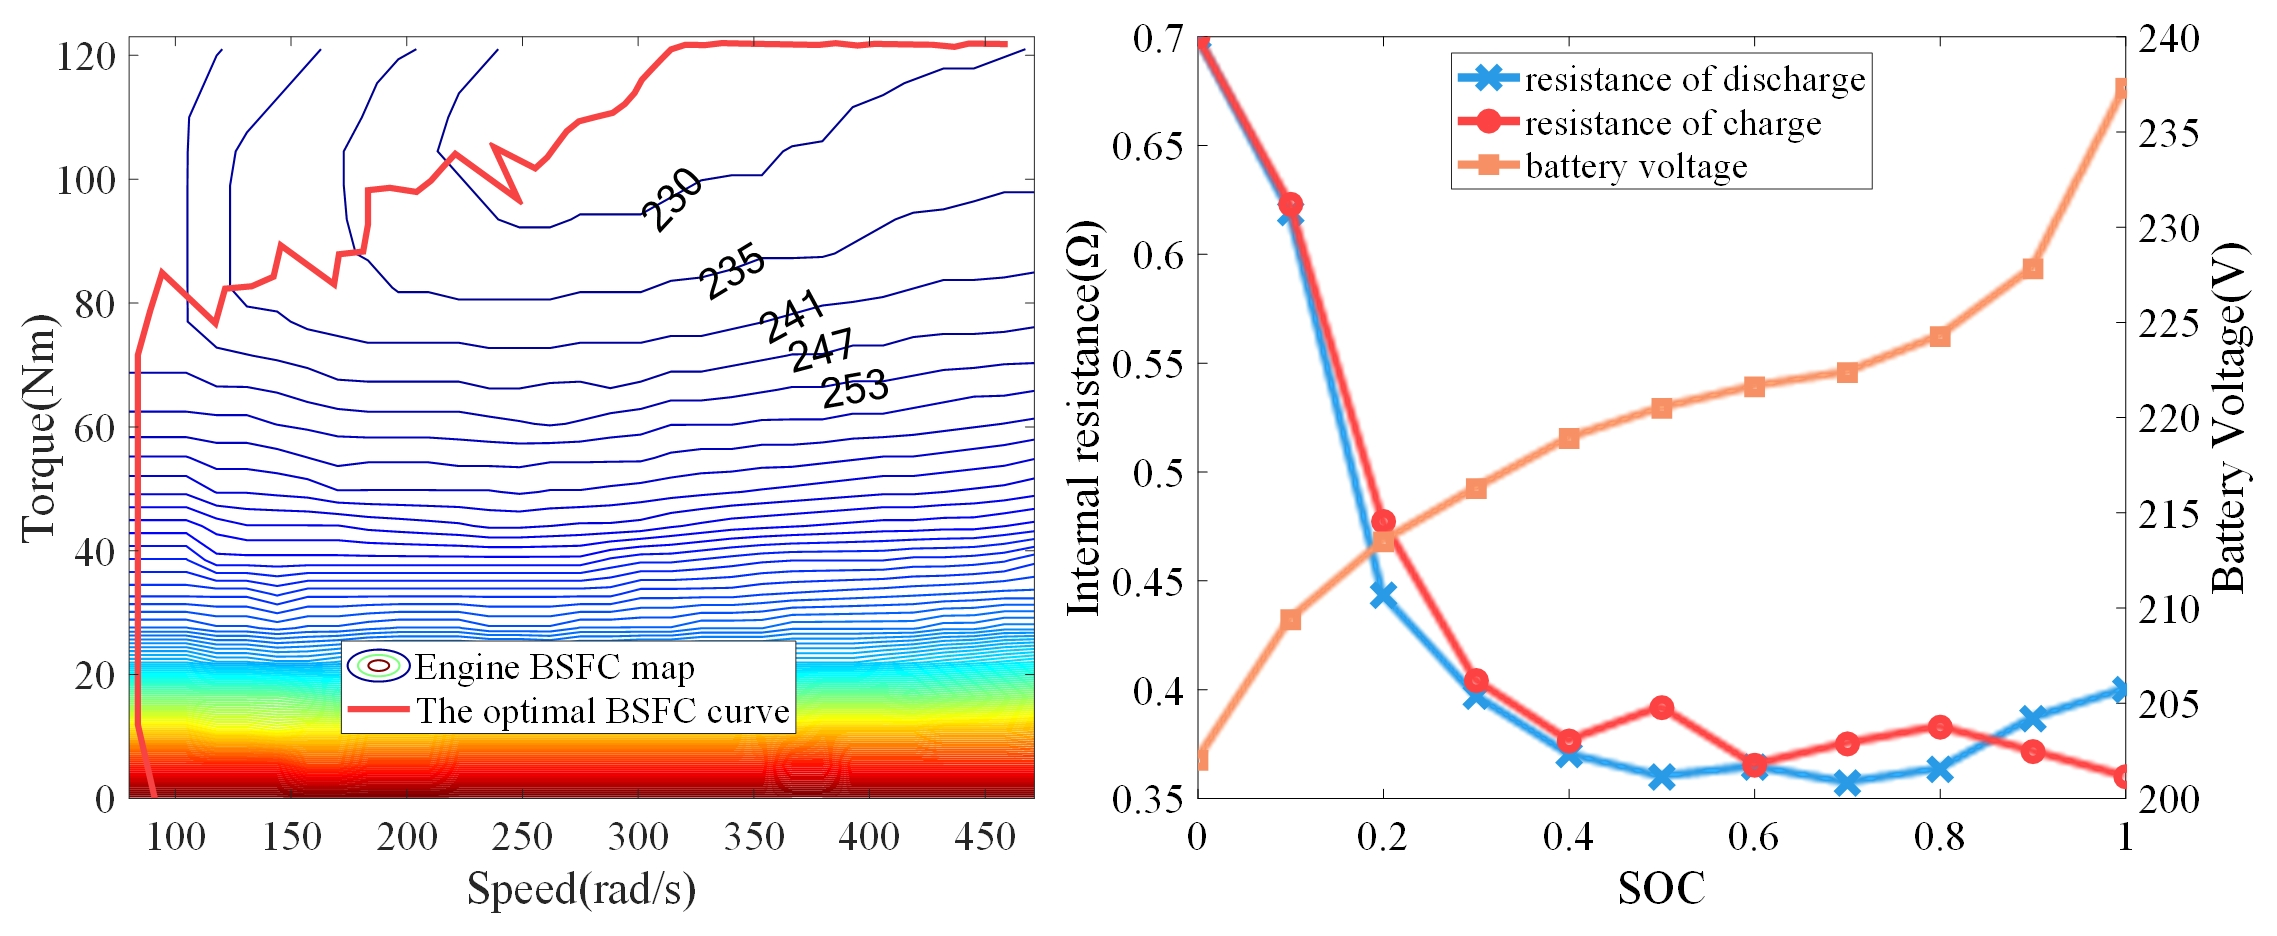

In [4]:
Eng_pwr_opt_list = np.arange(0, 57, 1) * 1000
W_list = [91.106186954104, 83.77580409572782, 83.77580409572782, 83.77580409572782, 83.77580409572782, 83.77580409572782, 83.77580409572782, 89.0117918517108, 94.24777960769379, 117.28612573401894, 121.47491593880532, 132.9940890019679, 142.4188669627373, 145.56045961632708, 168.59880574265222, 170.69320084504542, 181.1651763570114, 183.25957145940458, 183.25957145940458, 192.684349420174, 204.20352248333657, 210.48670779051614, 215.72269554649912, 220.95868330248211, 248.18581963359367, 237.71384412162766, 255.51620249196986, 260.7521902479528, 264.9409804527392, 269.1297706575256, 274.3657584135086, 281.69614127188476, 289.026524130261, 294.262511886244, 298.4513020910303, 301.59289474462014, 305.78168494940655, 309.9704751541929, 314.1592653589793, 320.4424506661589, 328.8200310757317, 336.15041393410786, 344.52799434368063, 352.90557475325346, 361.2831551628262, 369.660735572399, 378.0383159819718, 385.368698840348, 394.7934768011173, 402.12385965949346, 410.5014400690663, 418.87902047863906, 427.2566008882119, 436.6813788489813, 442.96456415616086, 451.3421445657336, 459.7197249753064]
Eng_pwr_func = interp1d(Eng_pwr_opt_list, W_list)  
        
Eng_spd_list = np.arange(0, 4501, 125) * (2 * math.pi) / 60
Eng_spd_list = Eng_spd_list[np.newaxis, :]
Eng_trq_list = np.arange(0, 111, 5) * (121 / 110)
Eng_trq_list = Eng_trq_list[np.newaxis, :]
data_path = "Eng_bsfc_map.mat"
data = scio.loadmat(data_path)
Eng_bsfc_map = data['Eng_bsfc_map']    
Eng_trq_maxP = [-4.1757e-009, 6.2173e-006, -3.4870e-003, 9.1743e-001, 2.0158e+001]
Eng_fuel_map = Eng_bsfc_map * (Eng_spd_list.T * Eng_trq_list) / 3600 / 1000
        

Eng_fuel_func = interp2d(Eng_trq_list, Eng_spd_list, Eng_fuel_map)
Image(filename = 'D:\GANSS-6\minor project\DRL-Energy-Management\Image\engine map and battery.jpg', width=600, height=400)

In [5]:
os.getcwd()


'd:\\GANSS-6\\minor project\\DRL-Energy-Management'

In [6]:
os.chdir('D:\GANSS-6\minor project\DRL-Energy-Management')

Motor parameters

In [7]:
# Motor 1
# motor speed list (rad/s)
Mot_spd_list = np.arange(-6000, 6001, 200) * (2 * math.pi) / 60    

# motor torque list (Nm)
Mot_trq_list = np.arange(-400, 401, 10)
        
# motor efficiency map
data_path1 = 'Mot_eta_quarter.mat'
data1 = scio.loadmat(data_path1)
Mot_eta_quarter = data1['Mot_eta_quarter']
Mot_eta_alltrqs = np.concatenate(([np.fliplr(Mot_eta_quarter[:, 1:]), Mot_eta_quarter]), axis = 1)
Mot_eta_map = np.concatenate(([np.flipud(Mot_eta_alltrqs[1:, :]), Mot_eta_alltrqs]))

# motor efficiency
Mot_eta_map_func = interp2d(Mot_trq_list, Mot_spd_list, Mot_eta_map)
        
#  motor maximum torque
Mot_trq_max_quarter = np.array([400,400,400,400,400,400,400,347.200000000000,297.800000000000,269.400000000000,241,221.800000000000,202.600000000000,186.400000000000,173.200000000000,160,148,136,126.200000000000,118.600000000000,111,105.800000000000,100.600000000000,96.2000000000000,92.6000000000000,89,87.4000000000000,85.8000000000000,83.2000000000000,79.6000000000000,76])
Mot_trq_max_quarter = Mot_trq_max_quarter[np.newaxis, :]
Mot_trq_max_list = np.concatenate((np.fliplr(Mot_trq_max_quarter[:, 1:]), Mot_trq_max_quarter), axis = 1) 

# motor minimum torque 
Mot_trq_min_list = - Mot_trq_max_list
Mot_trq_min_func = interp1d(Mot_spd_list, Mot_trq_min_list, kind = 'linear', fill_value = 'extrapolate')
Mot_trq_max_func = interp1d(Mot_spd_list, Mot_trq_max_list, kind = 'linear', fill_value = 'extrapolate')


Generator parameters

In [8]:
# Generator (Motor 2)
# generator speed list (rad/s)
Gen_spd_list = np.arange(-10e3, 11e3, 1e3) * (2 * math.pi) / 60

# generator torque list (Nm)
Gen_trq_list = np.arange(-75, 76, 5) 
        
# motor efficiency map
Gen_eta_quarter = np.array([[0.570000000000000,0.570000000000000,0.570000000000000,0.570000000000000,0.570000000000000,0.570000000000000,0.570000000000000,0.570000000000000,0.570000000000000,0.570000000000000,0.570000000000000,0.570000000000000,0.570000000000000,0.570000000000000,0.570000000000000,0.570000000000000],[0.570000000000000,0.701190476190476,0.832380952380952,0.845500000000000,0.845500000000000,0.845500000000000,0.845500000000000,0.841181818181818,0.832545454545455,0.825204545454546,0.820886363636364,0.816136363636364,0.807500000000000,0.798863636363636,0.794113636363636,0.789795454545455],[0.570000000000000,0.710238095238095,0.850476190476190,0.872272727272727,0.880909090909091,0.883500000000000,0.883500000000000,0.879181818181818,0.870545454545455,0.864500000000000,0.864500000000000,0.863636363636364,0.855000000000000,0.846363636363636,0.841613636363636,0.837295454545455],[0.570000000000000,0.710238095238095,0.850476190476190,0.872272727272727,0.880909090909091,0.883500000000000,0.883500000000000,0.883500000000000,0.883500000000000,0.883500000000000,0.883500000000000,0.883500000000000,0.883500000000000,0.883500000000000,0.875727272727273,0.867090909090909],[0.570000000000000,0.710238095238095,0.850476190476190,0.876159090909091,0.889113636363636,0.896022727272727,0.900340909090909,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.901636363636364,0.893000000000000,0.884363636363636,0.883500000000000,0.883500000000000],[0.570000000000000,0.714761904761905,0.859523809523810,0.885659090909091,0.898613636363636,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.894727272727273,0.886090909090909],[0.570000000000000,0.714761904761905,0.859523809523810,0.885659090909091,0.898613636363636,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.901636363636364,0.893000000000000,0.884363636363636,0.883500000000000,0.883500000000000],[0.570000000000000,0.714761904761905,0.859523809523810,0.885659090909091,0.898613636363636,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.901636363636364,0.893000000000000,0.884363636363636,0.883500000000000,0.883500000000000],[0.570000000000000,0.714761904761905,0.859523809523810,0.885659090909091,0.898613636363636,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.902500000000000,0.901636363636364,0.893000000000000,0.884363636363636,0.883500000000000,0.883500000000000],[0.570000000000000,0.714761904761905,0.859523809523810,0.885659090909091,0.898613636363636,0.902500000000000,0.902500000000000,0.898181818181818,0.889545454545454,0.886090909090909,0.894727272727273,0.901636363636364,0.893000000000000,0.884363636363636,0.883500000000000,0.883500000000000],[0.570000000000000,0.710238095238095,0.850476190476190,0.872272727272727,0.880909090909091,0.883500000000000,0.883500000000000,0.883500000000000,0.883500000000000,0.886090909090909,0.894727272727273,0.901636363636364,0.893000000000000,0.884363636363636,0.883500000000000,0.883500000000000]])
Gen_eta_alltrqs = np.concatenate((Gen_eta_quarter[:, 1:], Gen_eta_quarter), axis = 1)    
Gen_eta_map = np.concatenate(([np.flipud(Gen_eta_alltrqs[1:, :]), Gen_eta_alltrqs]))

# efficiency of the electric generator
Gen_eta_map_func = interp2d(Gen_trq_list, Gen_spd_list, Gen_eta_map)

# generator maxmium torque
Gen_trq_max_half = np.array([76.7000000000000,76.7000000000000,70.6160000000000,46.0160000000000,34.7320000000000,26.6400000000000,21.2000000000000,18.1160000000000,16.2800000000000,13.4000000000000,0])
Gen_trq_max_half = Gen_trq_max_half[np.newaxis, :]
Gen_trq_max_list = np.concatenate((np.fliplr(Gen_trq_max_half[:, 1:]), Gen_trq_max_half), axis = 1)

# generator minimum torque
Gen_trq_min_list = -Gen_trq_max_list
Gen_trq_min_func = interp1d(Gen_spd_list, Gen_trq_min_list, kind = 'linear', fill_value = 'extrapolate')
Gen_trq_max_func = interp1d(Gen_spd_list, Gen_trq_max_list, kind = 'linear', fill_value = 'extrapolate')


Battery parameters

In [9]:
# Battery
# published capacity of one battery cell
Batt_Q_cell = 6.5     

# coulombs, battery package capacity
Batt_Q = Batt_Q_cell * 3600     

# resistance and OCV list
Batt_rint_dis_list = [0.7,0.619244814,0.443380117,0.396994948,0.370210379,0.359869599,0.364414573,0.357095093,0.363394618,0.386654377,0.4] # ohm
Batt_rint_chg_list = [0.7,0.623009741,0.477267027,0.404193372,0.37640518,0.391748667,0.365290105,0.375071555,0.382795632,0.371566564,0.36] # ohm
Batt_vol_list  = [202,209.3825073,213.471405,216.2673035,218.9015961,220.4855042,221.616806,222.360199,224.2510986,227.8065948,237.293396] # V

# resistance and OCV
SOC_list = np.arange(0, 1.01, 0.1) 
Batt_vol_func = interp1d(SOC_list, Batt_vol_list, kind = 'linear', fill_value = 'extrapolate')
Batt_rint_dis_list_func = interp1d(SOC_list, Batt_rint_dis_list, kind = 'linear', fill_value = 'extrapolate')
Batt_rint_chg_list_func = interp1d(SOC_list, Batt_rint_chg_list, kind = 'linear', fill_value = 'extrapolate')  

#Battery current limitations
Batt_I_max_dis = 196
Batt_I_max_chg = 120 

# Battery information


Longitudinal force balance equation

In [10]:
# Wheel speed (rad/s)
Wheel_spd = car_spd / Wheel_R
    
# Wheel torque (Nm)
F_roll = mass * G * C_roll * (T_factor if car_spd > 0 else 0)
F_drag = 0.5 * density_air * area_frontal * C_d *(car_spd ** 2)
F_a = mass * car_a
T = Wheel_R * (F_a + F_roll + F_drag )
P_req = T * Wheel_spd

Calculate engine speed and torque

In [11]:
if Eng_pwr_opt > 56000:
    Eng_pwr_opt = 56000
        
if (Eng_pwr_opt < 500) or (T < 0):    
    Eng_pwr_opt = 0  
            
Eng_spd = Eng_pwr_func(Eng_pwr_opt)
Eng_trq = Eng_pwr_opt / Eng_spd  
        
# The minimum power of engine and braking energy recovery    
if (Eng_pwr_opt < 500) or (T < 0):
    Eng_trq = 0
    Eng_spd = 0
            
Eng_fuel_mdot = Eng_fuel_func(Eng_trq, Eng_spd)

# maximum engine torque boundary (Nm)
Eng_trq_max = np.polyval(Eng_trq_maxP, Eng_spd)
inf_eng = (Eng_trq > Eng_trq_max)

# engine power consumption
Eng_pwr = Eng_fuel_mdot * 42600

# Calculate fuel consumption
cost = (Eng_pwr / 42600)

F_pgs = (Eng_trq / (Pgs_R + Pgs_S))  

Calculate motor speed, torque and efficiency

In [12]:
Mot_spd = Pgs_K * Wheel_spd
Mot_trq = T / Pgs_K - F_pgs * Pgs_R
Mot_trq = (Mot_trq < 0) * (Mot_trq < Mot_trq_min_func(Mot_spd)) * Mot_trq_min_func(Mot_spd) +\
          (Mot_trq < 0) * (Mot_trq > Mot_trq_min_func(Mot_spd)) * Mot_trq +\
          (Mot_trq >= 0) * (Mot_trq > Mot_trq_max_func(Mot_spd)) * Mot_trq_max_func(Mot_spd) +\
          (Mot_trq >= 0) * (Mot_trq < Mot_trq_max_func(Mot_spd)) * Mot_trq 
        
Mot_trq = np.array(Mot_trq).flatten()  

Mot_eta = (Mot_spd == 0) + (Mot_spd != 0) * Mot_eta_map_func(Mot_trq, Mot_spd * np.ones(1)) #need to edit        
inf_mot = (np.isnan(Mot_eta)) + (Mot_trq < 0) * (Mot_trq < Mot_trq_min_func(Mot_spd)) + (Mot_trq >= 0) * (Mot_trq > Mot_trq_max_func(Mot_spd))
Mot_eta[np.isnan(Mot_eta)] = 1   

# Calculate electric power consumption
Mot_pwr = (Mot_trq * Mot_spd <= 0) * Mot_spd * Mot_trq * Mot_eta + (Mot_trq * Mot_spd > 0) * Mot_spd * Mot_trq / Mot_eta


Calculate generator speed, torque and efficiency

In [13]:
Gen_spd = (Eng_spd * (Pgs_R + Pgs_S) - Mot_spd * Pgs_R ) / Pgs_S
Gen_trq = - F_pgs * Pgs_S

Gen_eta = (Gen_spd == 0) + (Gen_spd != 0) * Gen_eta_map_func(Gen_trq, Gen_spd)
inf_gen = (np.isnan(Gen_eta)) + (Gen_trq < 0) * (Gen_trq < Gen_trq_min_func(Gen_spd)) + (Gen_trq >= 0) * (Gen_trq > Gen_trq_max_func(Gen_spd))
Gen_eta[np.isnan(Gen_eta)] = 1

# Calculate electric power consumption
Gen_pwr = (Gen_trq * Gen_spd <= 0) * Gen_spd * Gen_trq * Gen_eta + (Gen_trq * Gen_spd > 0) * Gen_spd * Gen_trq / Gen_eta


Calculate battery voltage, resistance, current, power and efficiency

In [14]:
Batt_vol = Batt_vol_func(SOC)
Batt_pwr = Mot_pwr + Gen_pwr  
Batt_rint = (Batt_pwr > 0) * Batt_rint_dis_list_func(SOC) + (Batt_pwr <= 0) * Batt_rint_chg_list_func(SOC)

#columbic efficiency (0.9 when charging)
Batt_eta = (Batt_pwr > 0) + (Batt_pwr <= 0) * 0.9
Batt_I_max = (Batt_pwr > 0) * Batt_I_max_dis + (Batt_pwr <= 0) * Batt_I_max_chg
        
# the limitation of Battery power
inf_batt_one = (Batt_vol ** 2 < 4 * Batt_rint * Batt_pwr)    
if Batt_vol ** 2 < 4 * Batt_rint * Batt_pwr:   
    Batt_pwr = Mot_pwr - Batt_vol ** 2 / (4 * Batt_rint)            
    Batt_I = Batt_eta * Batt_vol / (2 * Batt_rint)
    #print('battery power is out of bound')
else:          
    Batt_I = Batt_eta * (Batt_vol - np.sqrt(Batt_vol ** 2 - 4 * Batt_rint * Batt_pwr)) / 0.8
               
inf_batt = inf_batt_one + (np.abs(Batt_I) > Batt_I_max)

Calculate next state of charge (SoC)

In [15]:
SOC_new = - Batt_I / Batt_Q + SOC   

# Set new state of charge to real values
SOC_new = (np.conjugate(SOC_new) + SOC_new) / 2
        
if SOC_new > 1:
    SOC_new = 1.0

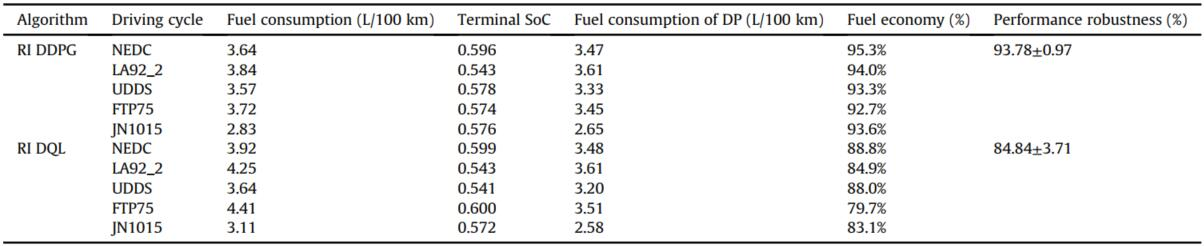

In [16]:
Image(filename = 'D:\GANSS-6\minor project\DRL-Energy-Management\Image\Comparison between RI DDPG and RI DQL.jpg')



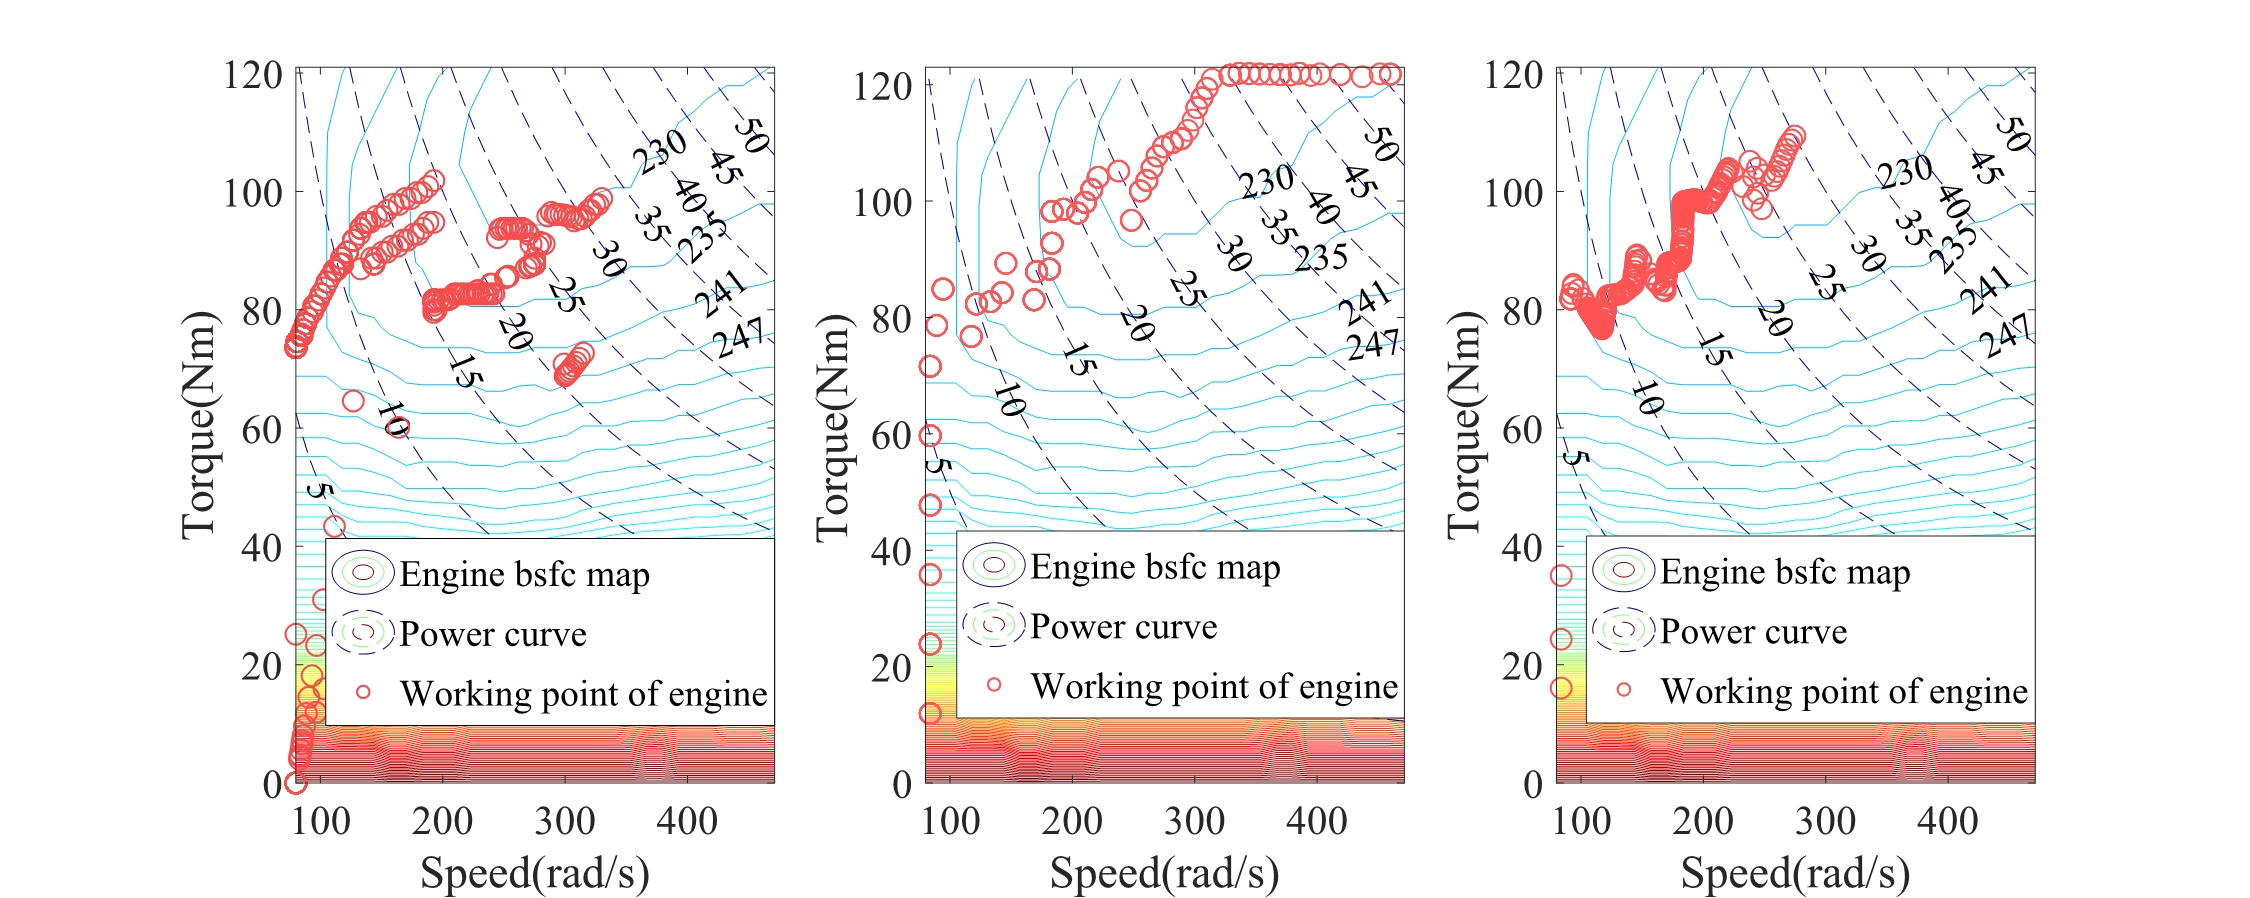

In [17]:
Image(filename = 'D:\GANSS-6\minor project\DRL-Energy-Management\Image\Working points of engine.jpg')

Output

In [18]:
print("Engine speed: %.3f rad/s" % Eng_spd)
print("Engine torque: %.3f Nm" % Eng_trq)
print("Engine power: %.3f W" % Eng_pwr_opt)
print("SoC: %.3f" % SOC_new)
print("Fuel consumption: %3f L" % (cost / 0.72 / 1000))

Engine speed: 328.820 rad/s
Engine torque: 121.647 Nm
Engine power: 40000.000 W
SoC: 0.552
Fuel consumption: 0.003440 L
